# Analyse COVID-19

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Fetching calculated data

In [2]:
df_dataset = pd.read_csv('dataset.csv', index_col=0)

In [3]:
df_dataset

,country,date,case,death,population,density,size,ratio,ratio_death,start_date,start_death_date,age,age_death
798.0,Belgium,2020-01-22,0.0,0.0,11589.616,382.748217,30280.0,0.000000,0.000000,2020-03-06,2020-03-18,-44.0,-56.0
799.0,Belgium,2020-01-23,0.0,0.0,11589.616,382.748217,30280.0,0.000000,0.000000,2020-03-06,2020-03-18,-43.0,-55.0
800.0,Belgium,2020-01-24,0.0,0.0,11589.616,382.748217,30280.0,0.000000,0.000000,2020-03-06,2020-03-18,-42.0,-54.0
801.0,Belgium,2020-01-25,0.0,0.0,11589.616,382.748217,30280.0,0.000000,0.000000,2020-03-06,2020-03-18,-41.0,-53.0
802.0,Belgium,2020-01-26,0.0,0.0,11589.616,382.748217,30280.0,0.000000,0.000000,2020-03-06,2020-03-18,-40.0,-52.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8377.0,United Kingdom,2020-03-17,1960.0,56.0,67886.004,280.601844,241930.0,2.887193,0.082491,2020-03-10,2020-03-14,7.0,3.0
8378.0,United Kingdom,2020-03-18,2642.0,72.0,67886.004,280.601844,241930.0,3.891818,0.106060,2020-03-10,2020-03-14,8.0,4.0
NaN,Indonesia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-18,NaN,NaN
NaN,Iraq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-17,NaN,NaN


## Filtering the countries

In [4]:
filtered_countries = ['China','US','France', 'Italy','Spain','Germany','South Korea', 'Japan', 'Iran']

In [5]:
colors = ['b','g','r','c','m','y','k','#ff00ff', '#00dd00']

# Dynamics

In [6]:
df_dynamics = df_dataset[['country','ratio_death','age_death']]

In [7]:
df_dynamics_t = df_dynamics.pivot(index='age_death',columns='country',values='ratio_death')

In [8]:
df_dynamics_plot = df_dynamics_t.loc[range(-20,50),filtered_countries]

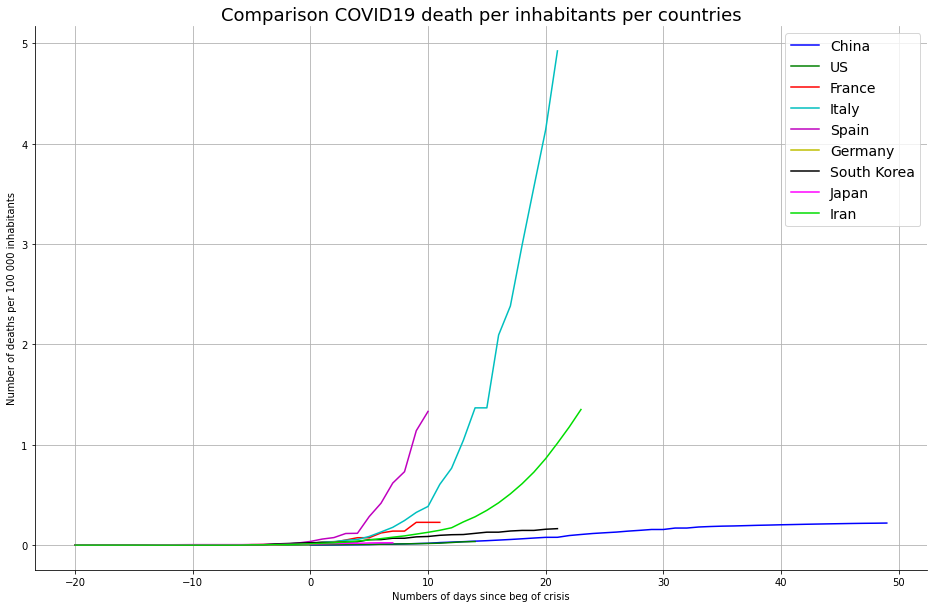

In [9]:
ax=df_dynamics_plot.plot(kind='line', figsize=(16,10), color=colors)
plt.title("Comparison COVID19 death per inhabitants per countries", fontsize=18)
plt.xlabel("Numbers of days since beg of crisis")
plt.ylabel("Number of deaths per 100 000 inhabitants")
plt.legend(fontsize=14)
plt.grid()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.savefig("death_ratio.png")
plt.show() 

In [10]:
df_dynamics_vol = df_dataset[['country','death','age_death']]

In [11]:
df_dynamics_vol_t = df_dynamics_vol.pivot(index='age_death',columns='country',values='death')
df_dynamics_vol_plot = df_dynamics_vol_t.loc[range(-20,50),filtered_countries]

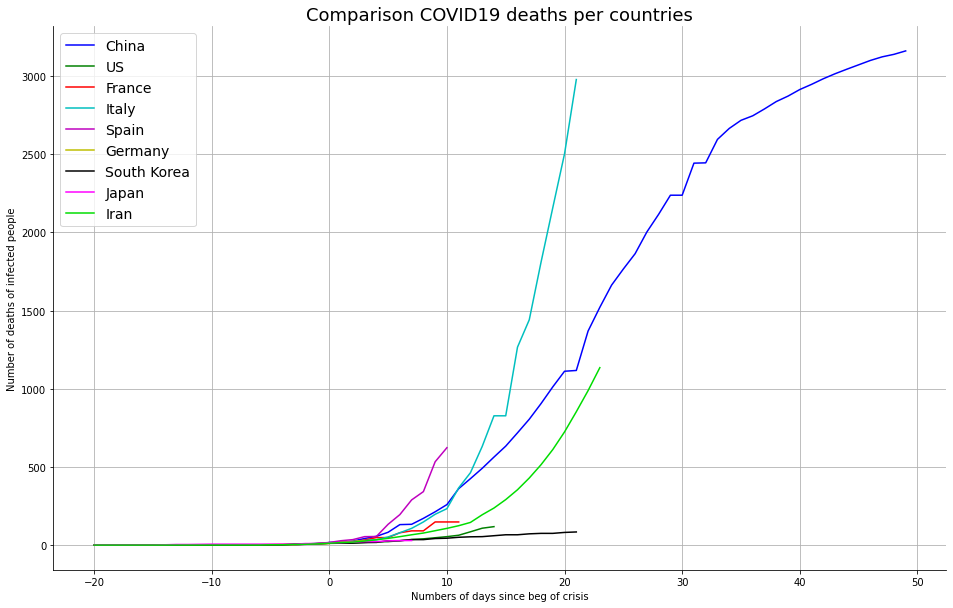

In [28]:
ax_vol=df_dynamics_vol_plot.plot(kind='line', figsize=(16,10), color= colors)
plt.title("Comparison COVID19 deaths per countries", fontsize=18)
plt.xlabel("Numbers of days since beg of crisis")
plt.ylabel("Number of deaths of infected people")
plt.legend(fontsize=14)
plt.grid()
ax_vol.spines['top'].set_visible(False)
ax_vol.spines['right'].set_visible(False)
ax_vol.set_yscale('log')
plt.savefig("death.png")
plt.show() 

## Cases

In [13]:
df_dynamics_cases = df_dataset[['country','ratio','age']].pivot(index='age',columns='country',values='ratio')

In [22]:
df_dynamics_cases_plot = df_dynamics_cases.loc[range(-20,40),filtered_countries]

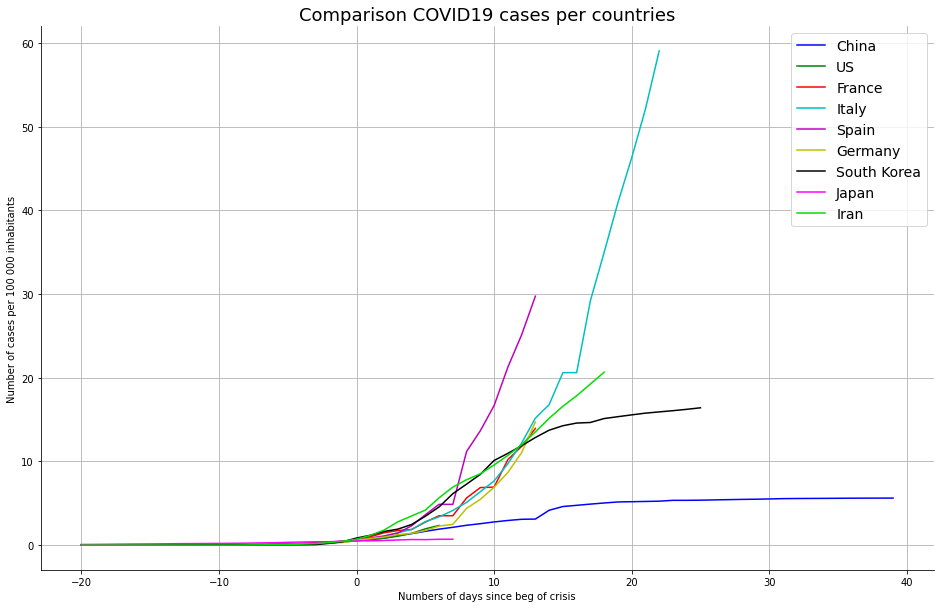

In [27]:
ax_cases=df_dynamics_cases_plot.plot(kind='line', figsize=(16,10), color=colors)
plt.title("Comparison COVID19 cases per countries", fontsize=18)
plt.xlabel("Numbers of days since beg of crisis")
plt.ylabel("Number of cases per 100 000 inhabitants")
plt.legend(fontsize=14)
plt.grid()
ax_cases.spines['top'].set_visible(False)
ax_cases.spines['right'].set_visible(False)
plt.savefig("cases.png")
plt.show() 

## Death rate
Should be stable

In [24]:
df_dataset['DR']=df_dataset['death']/df_dataset['case']

In [25]:
df_death_rate_pivot = df_dataset[['country','age_death', 'DR']].pivot(index='age_death',columns='country',values='DR').loc[range(0,50),filtered_countries]

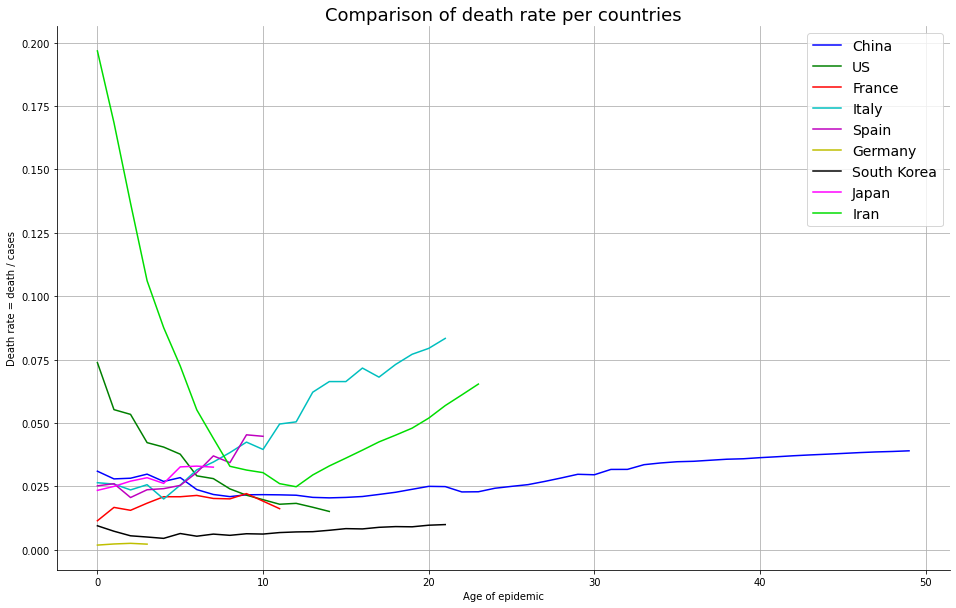

In [26]:
ax_vol=df_death_rate_pivot.plot(kind='line', figsize=(16,10), color= colors)
plt.title("Comparison of death rate per countries", fontsize=18)
plt.xlabel("Age of epidemic")
plt.ylabel("Death rate = death / cases")
plt.legend(fontsize=14)
plt.grid()
ax_vol.spines['top'].set_visible(False)
ax_vol.spines['right'].set_visible(False)
plt.savefig("death_rate.png")
plt.show() 